<a href="https://colab.research.google.com/github/leinaxd/Portfolio_Colab/blob/main/machine_learning/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Obs.** Ir a Herramientas -> combinación de teclas -> Elegir una tecla para **"Mostrar/Ocultar código"** y tocarlo en una celda con "@param"

# Tutorial de PySentimiento

sources

  [Hugging Face, BETO pysentimento](https://huggingface.co/finiteautomata/beto-sentiment-analysis?text=Te+quiero.+Te+amo.)

  [pysentimento Benchmarks](https://github.com/pysentimiento/pysentimiento/blob/master/CLASSIFIERS.md)

In [ ]:
# %%capture #Descomentar para no ver mucho texto

!pip install pysentimiento
import pysentimiento

## PARTE 1: Funcionamiento PySentimiento

In [ ]:
lang = "es" #@param ["es","en"]
task = "sentiment" #@param ["sentiment","emotion","hate_speech","ner","pos"]

from pysentimiento import create_analyzer
analyzer = create_analyzer(task, lang)


In [ ]:
texto = "Qu\xE9 gran jugador es Messi" #@param ["Qué gran jugador es Messi","Esto es pésimo","Qué es esto?","jejeje no te creo mucho"] {allow-input: true}
out   = analyzer.predict(texto)
print(out,'\n'+'='*100)
print(out.output)
print(out.probas)

AnalyzerOutput(output=POS, probas={POS: 0.994, NEG: 0.003, NEU: 0.003}) 
POS
{'NEG': 0.0029470971785485744, 'NEU': 0.0027645560912787914, 'POS': 0.9942883253097534}


## PARTE 2: Analizar un dataset

In [ ]:
%%capture
!pip install pysentimiento
import pysentimiento
lang = "es" #@param ["es","en"]
task = "emotion" #@param ["sentiment","emotion","hate_speech","ner","pos"]

from pysentimiento import create_analyzer
analyzer = create_analyzer(task, lang)

In [ ]:
assert task == 'emotion', f"Please rerun with task = emotion"
from google.colab import files
import pandas as pd
import io
# 1. Upload dataset
dataset = files.upload()

# 2. Convierto .csv a pandas (dataframe)
dataset = dataset.popitem()[-1] #discard the filename
dataset = dataset.decode('utf-8')
dataset = pd.read_csv(io.StringIO(dataset))

# 4. Defino la entrada y la salida del modelo
srcField = 'clean_transcripcion' #@param {type:'string'}
tgtField = 'Grupo' #@param {type:"string"}

Saving result_colombia_chile_2022-07-20.csv to result_colombia_chile_2022-07-20 (4).csv


In [ ]:
train_dataset = dataset #@markdown TODO: split the dataset.

In [ ]:
#@markdown analyze dataset
import pandas as pd
all_features = ['sadness','anger','surprise','fear','disgust','joy','others']

#Compute predictions for each sample
emotions = {k:[] for k in all_features} 
for sample in train_dataset[srcField]:
  pred = analyzer.predict(sample).probas
  for key, val in emotions.items():
    val.append(pred[key])

#Include emotions as new cols in the dataset
emotions = pd.DataFrame(emotions)
print(emotions)
train_dataset = pd.concat((train_dataset, emotions), axis=1)

     sadness     anger  surprise      fear   disgust       joy    others
0   0.002525  0.006190  0.012640  0.001520  0.002161  0.019174  0.955789
1   0.002230  0.002780  0.017614  0.001712  0.001695  0.204762  0.769208
2   0.004143  0.002199  0.009093  0.000968  0.001279  0.086426  0.895892
3   0.004164  0.008376  0.004107  0.002452  0.002624  0.018715  0.959561
4   0.006031  0.001878  0.007501  0.000701  0.001407  0.820138  0.162343
..       ...       ...       ...       ...       ...       ...       ...
58  0.004770  0.005866  0.014381  0.002624  0.003536  0.232651  0.736173
59  0.006616  0.002790  0.010828  0.001783  0.001529  0.090824  0.885631
60  0.006447  0.003583  0.006492  0.000870  0.001519  0.156929  0.824160
61  0.005981  0.002563  0.010884  0.001123  0.002047  0.592174  0.385228
62  0.004423  0.002384  0.009188  0.001214  0.001189  0.191865  0.789738

[63 rows x 7 columns]


CTR:
	sadness: 0.004661307115817354
	anger: 0.003907568858093804
	surprise: 0.011044179421982594
	fear: 0.001700846472799423
	disgust: 0.0019916097627997046
	joy: 0.14860264646510282
	others: 0.8280918314343407
AD:
	sadness: 0.005251531904962446
	anger: 0.003645018400025687
	surprise: 0.008812520032127699
	fear: 0.0016029904363676906
	disgust: 0.0016891873646749272
	joy: 0.22624066627273956
	others: 0.7527580688751879


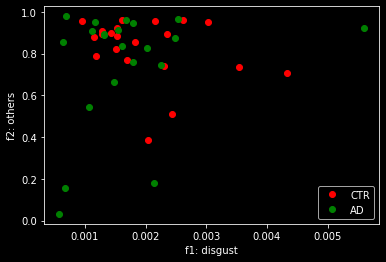

In [ ]:
#@markdown **PLOT**
group = "AD"   #@param ['AD','FTDbv']

CTR = train_dataset[train_dataset[tgtField]=='CTR']
AD  = train_dataset[train_dataset[tgtField]==group]
#@markdown PCA will ignore this values
feature_1 = 'disgust' #@param ['sadness','anger','surprise','fear','disgust','joy','others']
feature_2 = 'others' #@param ['sadness','anger','surprise','fear','disgust','joy','others']
assert feature_1 != feature_2, "features must be diferents"
PCA = False #@param {type:"boolean"}
show_means = True #@param {type:"boolean"}
#===========================================

if PCA:
  from sklearn.decomposition import PCA
  pca = PCA(n_components=2)

  x_CTR,y_CTR = pca.fit(CTR[all_features]).components_
  x_AD,y_AD = pca.fit(AD[all_features]).components_
else:
  _CTR = CTR[[feature_1,feature_2]]
  _AD  = AD[[feature_1,feature_2]]
  x_CTR,y_CTR = _CTR[feature_1],_CTR[feature_2]
  x_AD,y_AD = _AD[feature_1],_AD[feature_2]
#===========================================
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.plot(x_CTR,y_CTR,'or',label='CTR')
plt.plot(x_AD,y_AD,'og',label=group)

plt.xlabel('f1: '+feature_1)
plt.ylabel('f2: '+feature_2)
plt.legend();
#===========================================
if show_means:
  import numpy as np
  print('CTR:')
  for feature in all_features:
    print(f"\t{feature}: {np.mean(CTR[feature])}")
  print(f"{group}:")
  for feature in all_features:
    print(f"\t{feature}: {np.mean(AD[feature])}")

In [ ]:
train_dataset

In [ ]:
train_dataset.to_csv('emotion_analysis.csv')
"""
Esto guarda el dataset en la máquina virtual, recuerda descargar el archivo a mano.
"""

'\nEsto guarda el dataset en la máquina virtual, recuerda descargar el archivo a mano.\n'